## Observations and Insights 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseandstudy_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouseandstudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking for missing values. There do not seem to be any in this data set
mouseandstudy_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [115]:
# Checking the number of mice.
num_mice = len(mouseandstudy_df["Mouse ID"].unique())
num_mice


249

In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Note to self: check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
duplicate_mice = mouseandstudy_df.loc[mouseandstudy_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice)


['g989']


In [144]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all_data = mouseandstudy_df.loc[mouseandstudy_df["Mouse ID"]=='g989']
duplicate_mice_all_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates = mouseandstudy_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
no_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_nodups = len(no_duplicates["Mouse ID"].unique())
num_of_mice_nodups


249

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats = no_duplicates.groupby("Drug Regimen")
data_mean = summary_stats["Tumor Volume (mm3)"].mean()
data_median = summary_stats["Tumor Volume (mm3)"].median()
data_variance = data_variance = summary_stats["Tumor Volume (mm3)"].var()
data_std = summary_stats["Tumor Volume (mm3)"].std()
data_sem = summary_stats["Tumor Volume (mm3)"].sem()

summary_stats_all = pd.DataFrame({
                                    
                                    "Mean":data_mean,
                                    "Median":data_median,
                                    "Variance":data_variance,
                                    "Standard Deviation":data_std,
                                    "SEM":data_sem
                                 
                                 })
summary_stats_all

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# How to use .agg code Source: Pandas.core.groupby.DataFrameGroupBy.agg. (n.d.). Retrieved July 13, 2020, from https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
summary_data_grouped = no_duplicates.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_data_grouped = summary_data_grouped.rename(columns={"Total Trials","mean":"Mean","median":"Median","var":"Variance","std":"Standard Deviation","sem":"SEM"})
summary_data_grouped

Tumor Volume (mm3)                                   \
                   Total Trials       Mean     Median   Variance   
Drug Regimen                                                       
Capomulin                   230  40.675741  41.557809  24.947764   
Ceftamin                    178  52.591172  51.776157  39.290177   
Infubinol                   178  52.884795  51.820584  43.128684   
Ketapril                    188  55.235638  53.698743  68.553577   
Naftisol                    186  54.331565  52.509285  66.173479   
Placebo                     181  54.033581  52.288934  61.168083   
Propriva                    156  52.393463  50.909965  43.138803   
Ramicane                    228  40.216745  40.673236  23.486704   
Stelasyn                    181  54.233149  52.431737  59.450562   
Zoniferol                   182  53.236507  51.818479  48.533355   

                                           
             Standard Deviation       SEM  
Drug Regimen                               
Capomulin              4.994774  0.329346  
Ceftamin               6.268188  0.469821  
Infubinol              6.567243  0.492236  
Ketapril               8.279709  0.603860  
Naftisol               8.134708  0.596466  
Placebo                7.821003  0.581331  
Propriva               6.568014  0.525862  
Ramicane               4.846308  0.320955  
Stelasyn               7.710419  0.573111  
Zoniferol              6.966589  0.516398

## Bar and Pie Charts

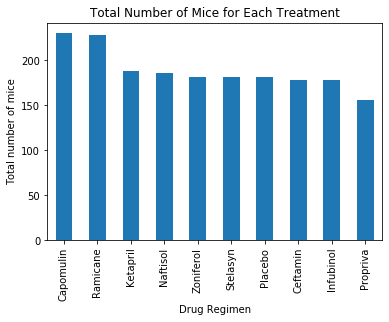

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_num = no_duplicates["Drug Regimen"].value_counts()
mice_num.plot(kind='bar', title='Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of mice')
plt.show()



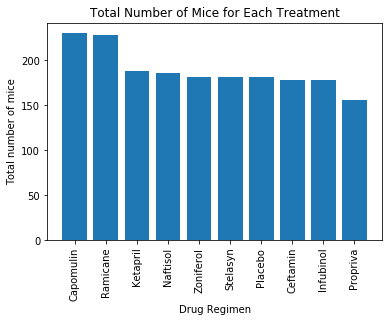

In [160]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_values = mice_num.index.values
y_values = mice_num.values
plt.bar(x_values, y_values)
plt.title('Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of mice')
plt.xticks(rotation = 90)
plt.show()


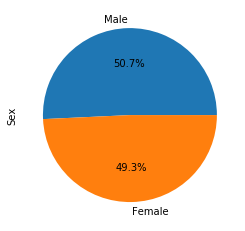

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = no_duplicates["Sex"].value_counts()
mice_gender.plot(kind='pie', autopct="%1.1f%%")
plt.show()




In [132]:
mice_gender

Male      958
Female    930
Name: Sex, dtype: int64

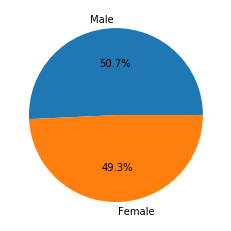

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels_values = mice_gender.index.values
y_values_gender = mice_gender.values
plt.pie(y_values_gender, labels = labels_values, autopct="%1.1f%%")
#plt.xticks(rotation = 90)
plt.show()


## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = no_duplicates.groupby("Mouse ID")
greatest_tumor = greatest_tumor["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()
greatest_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = greatest_tumor.merge(no_duplicates, on=["Mouse ID","Timepoint"], how="left")
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [143]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tuta (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merge_data.loc[merge_data["Drug Regimen"]== i,  "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    find_outlier = tumor_vol.loc[(tumor_vol < lower_bound)| (tumor_vol>upper_bound)]
    print(f"Drug{i} and outlier number is {find_outlier}")

DrugCapomulin and outlier number is Series([], Name: Tumor Volume (mm3), dtype: float64)
DrugRamicane and outlier number is Series([], Name: Tumor Volume (mm3), dtype: float64)
DrugInfubinol and outlier number is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
DrugCeftamin and outlier number is Series([], Name: Tumor Volume (mm3), dtype: float64)


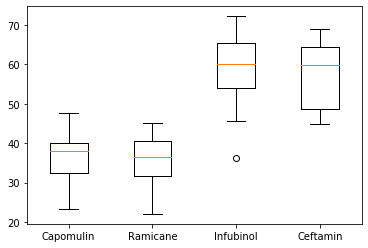

In [142]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels = treatment_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
